### Objectives of this notebook:
- display output from ABRM
- perform analysis on output. eg. feature importance and model selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import ABRM_functions

# pio.renderers.default = "notebook"
pio.renderers.default = "browser"


### Import data
- one df with FD performance of each particle  
- one df with associated particle position  
- one dicct with initial setup that would allow reproduction of results

In [2]:
# dataset = ["2020_06_18_17_31"]
dataset = ["2020_08_15_19_42"]


misfit_tolerance = 0.1

df_performance,df_position,df_tof,setup_all, FD_targets = ABRM_functions.read_data(dataset)

print("Number of models and parameters:")
display(df_position.shape)
print("Number of particles:")
display(df_position.particle_no.max()+1)
print("Number of Iterations:")
display(df_position.iteration.max()+1)
display(df_performance.head())
display(df_position.head())
display(df_tof.head())

Number of models and parameters:


(330, 23)

Number of particles:


30

Number of Iterations:


11

EV        tD         F       Phi      LC           tof  particle_no  \
0  0.000000  0.000000  0.000000  0.000000  0.1779  3.948977e+08            0   
1  0.642267  0.642268  0.000186  0.000119  0.1779  9.051438e+08            0   
2  0.647339  0.647341  0.000370  0.000237  0.1779  4.469694e+08            0   
3  0.651370  0.651374  0.000553  0.000356  0.1779  6.738078e+08            0   
4  0.653731  0.653736  0.000734  0.000475  0.1779  4.701472e+08            0   

     misfit  iteration           dataset  
0  0.336472          0  2020_08_15_19_42  
1  0.336472          0  2020_08_15_19_42  
2  0.336472          0  2020_08_15_19_42  
3  0.336472          0  2020_08_15_19_42  
4  0.336472          0  2020_08_15_19_42

TI1  Voronoi_x_1  Voronoi_y_1  TI2  Voronoi_x_2  Voronoi_y_2  TI3  \
0  2.0        176.0         54.0  3.0         90.0         67.0  2.0   
1  2.0         53.0         49.0  2.0          5.0         94.0  2.0   
2  2.0         82.0         16.0  1.0        198.0         39.0  3.0   
3  3.0         99.0         80.0  1.0        188.0         92.0  2.0   
4  4.0         13.0         21.0  3.0        192.0         30.0  2.0   

   Voronoi_x_3  Voronoi_y_3   FracpermX  ...   FracpermZ  MatrixpermZ  \
0        199.0         72.0  334.761224  ...  221.183967    50.530887   
1         16.0         89.0  361.114071  ...  692.035905    30.353164   
2        150.0         27.0  279.715767  ...  894.075261    10.046776   
3         21.0         25.0  330.205042  ...  176.764516    41.843450   
4        137.0          8.0  228.980712  ...  651.567899    44.835202   

     misfit  particle_no        LC  entropy_swarm  diversity_swarm  \
0  0.336472            0  0.177900          73.65          0.04819   
1  0.357046            1  0.180262          73.65          0.04819   
2  0.393090            2  0.151422          73.65          0.04819   
3  0.442546            3  0.113481          73.65          0.04819   
4  0.189942            4  0.280819          73.65          0.04819   

   diversity_best  iteration           dataset  
0             0.0          0  2020_08_15_19_42  
1             0.0          0  2020_08_15_19_42  
2             0.0          0  2020_08_15_19_42  
3             0.0          0  2020_08_15_19_42  
4             0.0          0  2020_08_15_19_42  

[5 rows x 23 columns]

tof    misfit  particle_no  iteration           dataset
0  3.948977e+08  0.336472            0          0  2020_08_15_19_42
1  3.866192e+08  0.336472            0          0  2020_08_15_19_42
2  3.900423e+08  0.336472            0          0  2020_08_15_19_42
3  4.073353e+08  0.336472            0          0  2020_08_15_19_42
4  4.467031e+08  0.336472            0          0  2020_08_15_19_42

### Plot performance

In [3]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
ABRM_functions.plot_performance(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance)

### Boxplots parameters
explore if ranges of parameters need potential modifications

In [4]:
pio.renderers.default = "notebook"
# pio.renderers.default = "browser"
ABRM_functions.plot_box(df = df_position,setup_all = setup_all, dataset = dataset)

### Histogram Paramters

In [5]:
ABRM_functions.plot_hist(df = df_position,setup_all = setup_all, dataset = dataset,misfit_tolerance = None)

### Histograms for best models parameters

In [6]:
ABRM_functions.plot_hist(df = df_position,setup_all = setup_all, dataset = dataset,misfit_tolerance = misfit_tolerance)

### Cluster best models with UMAP and HDBSCAN

In [8]:
df_best = ABRM_functions.best_model_selection_UMAP_HDBSCAN(df_position = df_position,df_tof = df_tof,cluster_parameter = "tof",dataset =dataset,setup_all = setup_all,
                                                           n_neighbors= 5, min_cluster_size=4, misfit_tolerance = misfit_tolerance,
                                                           use_UMAP = True)


# Diversity Tests

In [137]:
iterations = 2
particles = 30
cells = 140000
shorten = cells* iterations * particles -1
df_tof.shape
df_tof_short = df_tof.truncate(after = shorten)
df_tof_short.shape

(8400000, 5)

In [141]:
# def plot_tof_hist(df, misfit_tolerance = None):
from pyentrp import entropy as ent
from skimage.util.shape import view_as_windows
window_shape = (10,10,7)
step_size = 10
iterations = df_tof_short["iteration"].unique().tolist()
particle_no = df_tof_short["particle_no"].unique().tolist()
df_upscaled_tof = pd.DataFrame(columns = np.arange(20*10*1))
for i in range(0,len(iterations)):
    iteration = iterations[i]
    for j in range(0,len(particle_no)):
        particle = particle_no[j]
        tof_single_particle = np.array(df_tof_short[(df_tof_short.iteration == iteration) & (df_tof_short.particle_no == particle)].tof)
        tof_single_particle_3d = tof_single_particle.reshape((200,100,7))
        tof_single_particle_moving_window = view_as_windows(tof_single_particle_3d, window_shape, step= step_size)
        tof_single_particle_upscaled = []
        for k in range(0,20):
            for l in range(0,10):
                for m in range(0,1):
                    single_cell_temp = np.round(np.mean(tof_single_particle_moving_window[k,l,m]))
                    tof_single_particle_upscaled.append(single_cell_temp)

#         df_tof_single_particle_upscaled = pd.DataFrame(np.log10(np.array(tof_single_particle_upscaled)))
        df_tof_single_particle_upscaled = pd.DataFrame((np.array(tof_single_particle_upscaled)))

        df_tof_single_particle_upscaled_transposed = df_tof_single_particle_upscaled.T
        df_tof_single_particle_upscaled_transposed["particle_no"] = particle
        df_tof_single_particle_upscaled_transposed["iteration"] = iteration
        df_upscaled_tof = df_upscaled_tof.append(df_tof_single_particle_upscaled_transposed)

# columns = list(np.arange(0,df_best_for_clustering.shape[1]))

# cols_range = [1,2,3]

# n_cols = int(len(cols_range))
# n_rows = int(np.ceil(len(columns)/n_cols))

# cols = cols_range* n_rows 
# len_row  = list(np.arange(1,n_rows+1,1))
# rows = sorted(n_cols*len_row)

# for i in range(0,len(rows)):
#     rows[i]=rows[i].item()

# n_subplots = len(columns)/n_rows/n_cols

# fig = make_subplots(rows=n_rows, cols=n_cols)#, subplot_titles=(columns))

# if misfit_tolerance is not None:

#     df_best =df[(df.misfit <= misfit_tolerance)]
#     df_best = df_best[columns]

#     for i in range(0,len(columns)):
#         # fig.append_trace(go.Histogram(x=df[columns[i]]),row = rows[i],col = cols[i])

#         fig.append_trace(go.Histogram(x=df_best[columns[i]]),row = rows[i],col = cols[i])

#         fig.update_layout(
#                 showlegend=False,
#                 barmode='overlay'        # Overlay both histograms
#                 )
#         fig.update_traces(opacity = 0.75) # Reduce opacity to see both histograms


#     fig.update_layout(autosize=False,
#         title= "Histogram Parameters",
#         width=1000,
#         height=750*(n_subplots)
#     )
#     fig.show()

# else:

#     for i in range(0,len(columns)):

#         fig.append_trace(go.Histogram(x=df[columns[i]]),row = rows[i],col = cols[i])
#         fig.update_layout(
#                 showlegend=False
#                 )
#     fig.update_layout(autosize=False,
#         title= "Histogram Parameters",
#         width=1000,
#         height=750*(n_subplots)
#     )
#     fig.show()

In [158]:
df_upscaled_tof.drop(["particle_no"],inplace = True,axis = 1)

In [313]:
all_cells_entropy = []
n_particles = 60
# calculate entropy for each column of newly created df
for i in range(0,df_upscaled_tof.shape[1]):
# for i in range(0,10):
    # single cell in all models    
    cell = np.array(df_upscaled_tof[i])
    cell = cell.reshape(-1,1)
#     print(cell)
    # scale tof
    scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

    cell = scaler.fit_transform(cell)#.reshape(-1,1))l
#     print(cell_scaled)
    # discretize with the help of HDBSCAN
    # Create HDBSCAN clusters
    hdb = hdbscan.HDBSCAN(min_cluster_size=2,
                          min_samples=2, 
                          cluster_selection_epsilon=0.04,
                         cluster_selection_method = "leaf")#, cluster_selection_epsilon = 0.1)#,min_samples  =1)
    scoreTitles = hdb.fit(cell)
    cell_cluster_id = scoreTitles.labels_
    
    # unclustered cells get unique value
    for i in range(0,len(cell_cluster_id)):
        if cell_cluster_id[i] == -1:
            cell_cluster_id[i] = np.max(cell_cluster_id) + 1
                       
#     print(cell_cluster_id)

    parameter_entropy = np.array(ent.shannon_entropy(cell_cluster_id))
    all_cells_entropy.append(parameter_entropy)

# sum up entropy for that particle
swarm_upscaled_entropy = np.sum(all_cells_entropy)
print("swarm_diverstiy")
print(swarm_upscaled_entropy)
# diversity
n_cells = df_upscaled_tof.shape[1]
diversity_swarm = (1/(n_particles*n_cells)) * swarm_upscaled_entropy
print(diversity_swarm)


swarm_diverstiy
462.84359846186874
0.038570299871822394


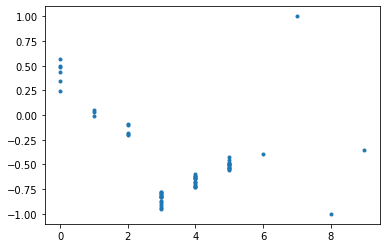

In [314]:
import matplotlib.pyplot as plt
plt.plot(cell_cluster_id,cell,".")
# plt.hist(cell)
# plt.plot(cell)


### Build best performing models for flow simulation

In [5]:
best_models = ABRM_functions.save_best_clustered_models(df_best = df_best, datasets = dataset)

In [13]:
best_index = best_models.index.tolist()

### Feature importance - model explainability

In [8]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [9]:
columns = setup_all[dataset[0]]["columns"]
X_train = df_position[columns]
Y_train = df_position.LC

In [10]:
# load JS visualization code to notebook
shap.initjs()

In [11]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


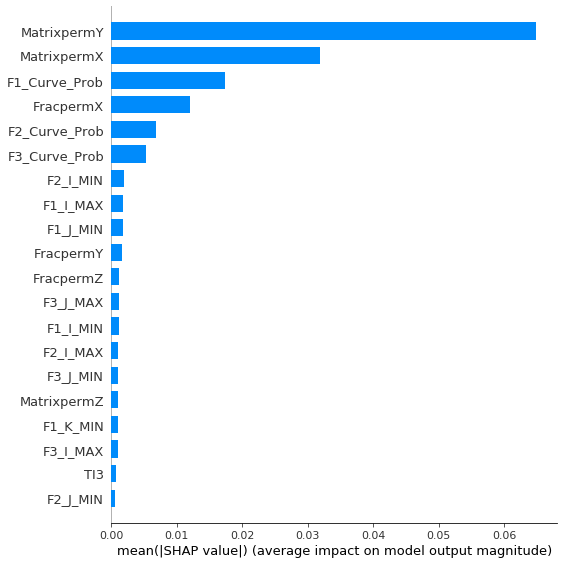

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [20]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [21]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

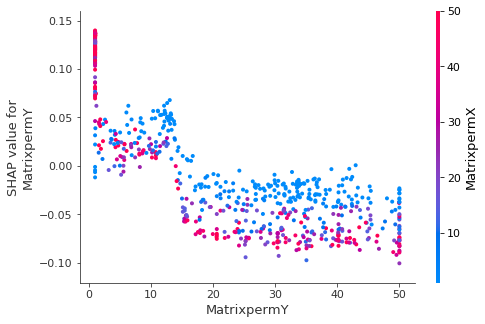

In [13]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("MatrixpermY", shap_values, X_train)

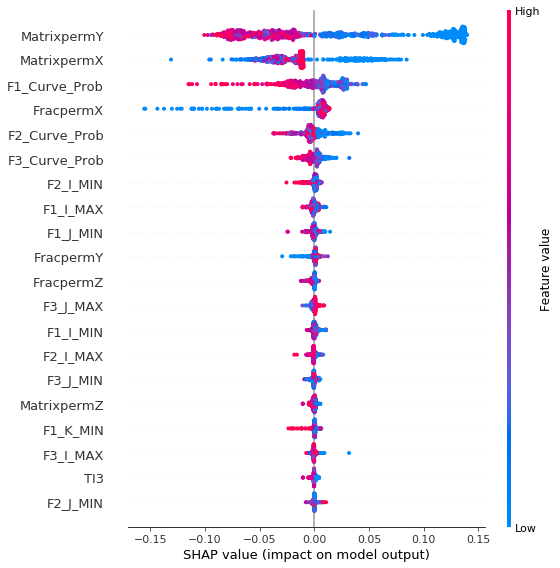

In [14]:
shap.summary_plot(shap_values, X_train)


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_performance(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance):
    # Create traces

    fig = make_subplots(rows = 2, cols = 1,
                       subplot_titles = ("F - Phi Graph","Sweep Efficieny Graph"))

    ### Misfit ###
    
 

#     ### LC plot ###
    
#     fig.add_trace(go.Scatter(x = df_position.index, y=df_position.LC,
#                             mode='markers',
#                             line = dict(color = "lightgray"),
#                             name='Simulated'),row =1, col =2)
#     fig.add_trace(go.Scatter( x= df_position.index[(df_position.misfit <= misfit_tolerance)],y=df_position.loc[(df_position.misfit <= misfit_tolerance,"LC")],
#                                 mode = "markers",
#                             line = dict(color = "magenta")),row =1, col =2)
    
#     fig.add_shape(
#             # Line Horizontal
#                 type="line",
#                 x0=0,
#                 y0=FD_targets[dataset[0]]["LC_interpolated"], # make date a criterion taht can be changed
#                 x1=df_position.index.max(),
#                 y1=FD_targets[dataset[0]]["LC_interpolated"],
#                 line=dict(
#                     color="red",
#                     width=2),row =1, col = 2)

#     fig.update_xaxes(title_text = "particles",row = 1, col = 1)
#     fig.update_yaxes(title_text = "RMSE",row = 1, col = 1)
#     fig.update_xaxes(title_text = "particles",range = [0,df_position.index.max()],row =1, col = 2)
#     fig.update_yaxes(title_text = "LC",range = [0,1], row =1, col = 2)

    ### F - Phi plot ###
    colorscale = ['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']

#     fig.add_trace(go.Scatter(x=df_performance.Phi, y=df_performance.F,
#                             mode='lines',
#                             line = dict(color = "lightgray"),
#                             name='Simulated'),row =2, col =1)
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].F

            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
            cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = colorscale[cluster]),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)


    
    fig.add_trace(go.Scatter(x = FD_targets[dataset[0]]["Phi_interpolated"], y = FD_targets[dataset[0]]["F_interpolated"],
                            mode = "lines",
                            line = dict(color = "red", width = 3),
                            name = "target"),row =1, col =1)
    
    fig.add_trace(go.Scatter(x = [0,1], y = [0,1],
                            mode = "lines",
                            line = dict(color = "black", width = 3),
                            name = "homogeneous"),row =1, col =1)

    fig.update_xaxes(title_text = "Phi", range = [0,1],row =1, col =1)
    fig.update_yaxes(title_text = "F",range = [0,1], row =1, col = 1)

    ### Sweep efficiency plot ###
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =2, col =1)

    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].tD
            cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = colorscale[cluster]),
                                text = "nothing yet",
                                name = "best simulations"),row =2, col =1)

    fig.update_xaxes(title_text = "tD", range = [0,1],row =2, col =1)
    fig.update_yaxes(title_text = "Ev",range = [0,1], row =2, col = 1)

    fig.update_layout(title='Performance Evaluation - Simulation run {}'.format(dataset),
                       autosize = False,
                     width = 1000,
                     height = 1000,
                     showlegend = False)

    fig.show()

In [16]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
plot_performance(df_performance_test,df_position,FD_targets,setup_all,dataset,misfit_tolerance)

In [4]:
df_performance_test = df_performance.copy()
df_performance_test["cluster"] = 8

In [5]:
df_performance_test.iteration

0          0
1          0
2          0
3          0
4          0
          ..
982795    12
982796    12
982797    12
982798    12
982799    12
Name: iteration, Length: 982800, dtype: int64

In [6]:
# EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
# tof_single_particle = df_best_temp[(df_best_temp.iteration == iteration) & (df_best_temp.particle_no == particle)].tof

index = df_best.index
iteration = df_best.iteration.tolist()
particle_no = df_best.particle_no.tolist()
cluster = df_best.cluster.tolist()
for i in range(0,df_best.shape[0]):
    df_performance_test.cluster[(df_performance_test.iteration == iteration[i]) & (df_performance_test.particle_no == particle_no[i])] = cluster[i]
#     df_performance_test["cluster"] = df_best[(df_performance_test.iteration == df_best.iteration[i])].cluster


C:\Users\bs48\AppData\Local\Continuum\anaconda_3\envs\MRST\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



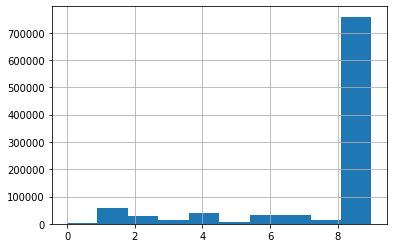

In [7]:
df_performance_test.cluster += 1

df_performance_test.cluster.hist()

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_performance_selected(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance,best_index):
    # Create traces

    fig = make_subplots(rows = 2, cols = 1,
                       subplot_titles = ("F - Phi Graph","Sweep Efficieny Graph"))

    ### F - Phi plot ###
    colorscale = ['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']


    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].F

            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
#             cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "gray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,len(best_index)):
            iteration = int(df_position[(df_position.index == best_index[i])].iteration)
            particle_no = int(df_position[(df_position.index == best_index[i])].particle_no)
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = colorscale[i] ),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)


    
    fig.add_trace(go.Scatter(x = FD_targets[dataset[0]]["Phi_interpolated"], y = FD_targets[dataset[0]]["F_interpolated"],
                            mode = "lines",
                            line = dict(color = "red", width = 3),
                            name = "target"),row =1, col =1)
    
    fig.add_trace(go.Scatter(x = [0,1], y = [0,1],
                            mode = "lines",
                            line = dict(color = "black", width = 3),
                            name = "homogeneous"),row =1, col =1)

    fig.update_xaxes(title_text = "Phi", range = [0,1],row =1, col =1)
    fig.update_yaxes(title_text = "F",range = [0,1], row =1, col = 1)

    ### Sweep efficiency plot ###
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =2, col =1)

    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "gray"),
                                text = "nothing yet",
                                name = "best simulations"),row =2, col =1)
    
    for i in range (0,len(best_index)):
        iteration = int(df_position[(df_position.index == best_index[i])].iteration)
        particle_no = int(df_position[(df_position.index == best_index[i])].particle_no)
        EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].EV
        tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].tD
#             cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
        fig.add_trace(go.Scatter(x=tD, y=EV,
                            mode='lines',
                            line = dict(color = colorscale[i] ),
                            text = "nothing yet",
                            name = "Simulated"),row =2, col =1)
    

    fig.update_xaxes(title_text = "tD", range = [0,1],row =2, col =1)
    fig.update_yaxes(title_text = "Ev",range = [0,1], row =2, col = 1)

    fig.update_layout(title='Performance Evaluation - Simulation run {}'.format(dataset),
                       autosize = False,
                     width = 1000,
                     height = 1000,
                     showlegend = False)

    fig.show()

In [27]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
plot_performance_selected(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance,best_index)